In [68]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from tqdm import tqdm
import main_module as mm
import importlib

## Compute the dynamics

In [69]:
importlib.reload(mm)
Tmax = 1e6
v = mm.get_param()[0]
params = {}
params['reverse'] = False
init_list = []
SAMPLE_MAX = 64
tlist = np.logspace(-3, np.log10(Tmax), 2000)
random.seed(0)
sol_list = []
params_list = []
steady_sol = []
for sample in tqdm(range(SAMPLE_MAX)):
    params['v_next'] = [10**random.uniform(-3,2) for i in range(len(v))]
    params_list.append(params)
    init = np.array([10**random.uniform(-10,5) for i in range(2)] + [10**random.uniform(-4,0) for i in range(1)])
    init_list.append(init)
    sol = mm.ComputeODE(params, init, tlist)
    sol_list.append(sol)
    steady_sol.append(sol.y[:,-1])
    

  0%|          | 0/64 [00:00<?, ?it/s]

100%|██████████| 64/64 [00:03<00:00, 20.07it/s]


## Plot dynamics

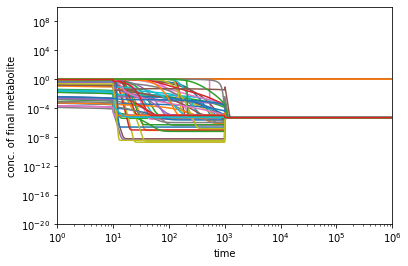

In [70]:
# plot the solution
startidx = 0
for i in range(SAMPLE_MAX):
    plt.plot(sol_list[i].t, sol_list[i].y[2,:])
plt.xlim([1,Tmax])

plt.xscale('log')
plt.yscale('log')
plt.ylim([1e-20,1e10])
plt.xlabel('time')
plt.ylabel('conc. of final metabolite')
plt.show()


## Export the attractor data

In [71]:
survive, dead = -1, -1
X = np.zeros((2,4))
for _, sol in enumerate(sol_list):
    tmp = list(sol.y[:,-1]) + [1.0 - sol.y[2,-1]]
    if sol.y[2,-1] > 1e-3 and survive < 0:
        survive = _
        X[0,:] = tmp[:]
    if sol.y[2,-1] < 1e-3 and dead < 0:
        dead = _
        X[1,:] = tmp[:]
    if survive and dead:
        break
np.savetxt('result/glyc_survive_dead.csv', X, delimiter=',')

## Run reverse dynamics for the time course figures

(ここから下は本質的でないのでみなくてOK)


In [101]:
importlib.reload(mm)
idx = [survive,dead]
Tmax = 100
params['reverse'] = True
tlist = np.logspace(-8, np.log10(Tmax), 128)
sol_list_reverse = []
for i in range(2):
    init = np.array(sol_list[idx[i]].y[:,1200])
    sol = mm.ComputeODE(params, init, tlist)
    sol_list_reverse.append(sol)



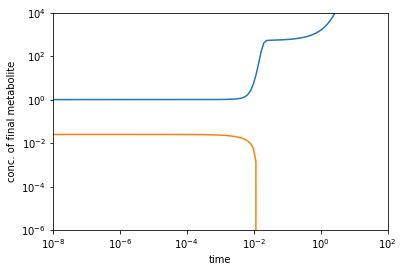

In [109]:
# plot the solution
SAMPLE_MAX = 2
startidx = 0
for i in range(SAMPLE_MAX):
    plt.plot(sol_list_reverse[i].t, sol_list_reverse[i].y[2,:])
plt.xlim([1e-8,Tmax])

plt.xscale('log')
plt.yscale('log')
plt.ylim([1e-6,1e4])
plt.xlabel('time')
plt.ylabel('conc. of final metabolite')
plt.show()


In [113]:
sol_list_reverse[0].y[:,30], sol_list_reverse[1].y[:,30]

(array([  0.30095509, 180.55655668,   0.99255919]),
 array([0.18553957, 0.02144466, 0.0247508 ]))

## Export the two representative dynamics for the figure

In [119]:
importlib.reload(mm)
idx = [survive,dead]
Tmax = 1e4
init_list = [sol_list_reverse[0].y[:,30], sol_list_reverse[1].y[:,30]]
params['reverse'] = False
params['v_next'] = mm.get_param()[0]
tlist = np.logspace(-8, np.log10(Tmax), 128)
sol_list_forward = []
for i in range(2):
    init = np.array(sol_list[idx[i]].y[:,1200])
    sol = mm.ComputeODE(params, init, tlist)
    sol_list_forward.append(sol)

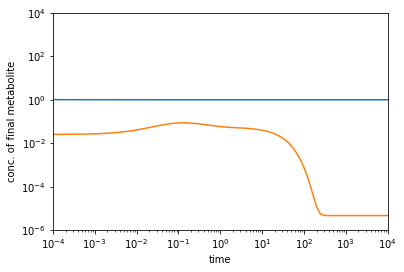

In [122]:
# plot the solution
SAMPLE_MAX = 2
startidx = 0
for i in range(SAMPLE_MAX):
    plt.plot(sol_list_forward[i].t, sol_list_forward[i].y[2,:])
plt.xlim([1e-4,Tmax])

plt.xscale('log')
plt.yscale('log')
plt.ylim([1e-6,1e4])
plt.xlabel('time')
plt.ylabel('conc. of final metabolite')
plt.show()


In [124]:
os.makedirs('dynamics', exist_ok=True)
Y = np.hstack([sol_list_forward[0].t.reshape(-1,1),sol_list_forward[0].y.T])
np.savetxt('dynamics/glyc_survive.csv', Y, delimiter=' ')
Y = np.hstack([sol_list_forward[1].t.reshape(-1,1),sol_list_forward[1].y.T])
np.savetxt('dynamics/glyc_dead.csv', Y, delimiter=' ')